# Comparison between RS and CZT

In this example, we will analyze how CZT algorithm produces better results than in RS when the region of interest in the focus of a lens.

## X Scheme

In [7]:
from diffractio import mm, um, np, plt
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

In [8]:
focal = 25 * mm
diameter = 4 * mm

# Initial parameters
x0 = np.linspace(-diameter / 2 - 50 * um, diameter / 2 + 50 * um, 4096)
wavelength = 0.6238 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, focal=focal, radius=diameter / 2)

u1 = t0 * u0

**RS**

CPU times: user 11.4 ms, sys: 1.75 ms, total: 13.2 ms
Wall time: 12.9 ms


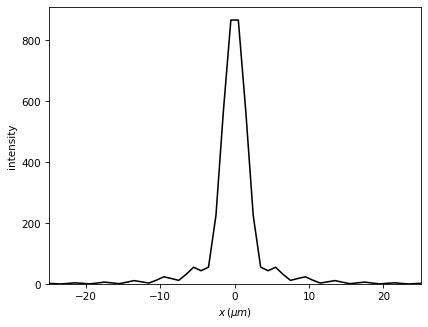

In [9]:
%%time
u2_rs = u1.RS(z=focal, verbose=False)
u2_rs.draw()
plt.xlim(-25, 25)

**CZT**

CPU times: user 12.6 ms, sys: 13.3 ms, total: 25.9 ms
Wall time: 8.59 ms


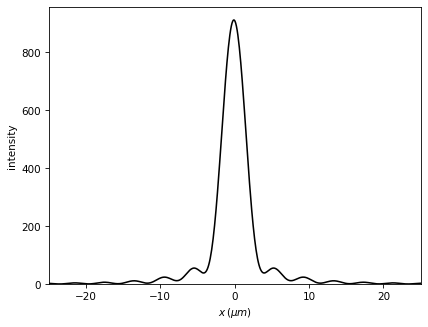

In [10]:
%%time
xout=np.linspace(-25,25,512)
u2_czt = u1.CZT(z=focal, xout=xout)
u2_czt.draw()


## XZ scheme

In [11]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [12]:
focal = 15 * mm
diameter = 4 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter / 2, focal=focal)

u1 = u0 * t0

**RS**

CPU times: user 171 ms, sys: 6.86 ms, total: 177 ms
Wall time: 177 ms


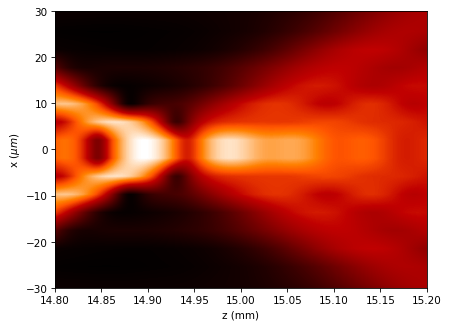

In [13]:
%%time
z0 = np.linspace(14.8*mm, 15.2*mm, 512)
u2_rs = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2_rs.incident_field(u1)
u2_rs.RS(num_processors=1);
u2_rs.draw(logarithm=1e-1, z_scale='mm')
plt.ylim(-30,30)


**CZT**

CPU times: user 311 ms, sys: 69.9 ms, total: 380 ms
Wall time: 293 ms


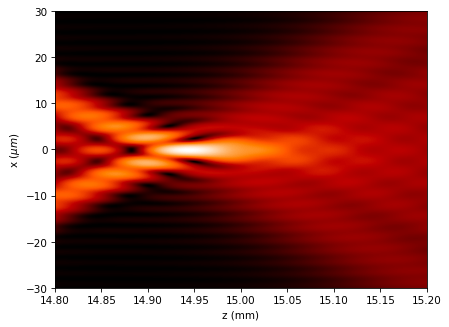

In [14]:
%%time
xout=np.linspace(-30,30,256)
u2_czt = u1.CZT(z=z0, xout=xout)
u2_czt.draw(logarithm=1e-1, z_scale='mm')


### XY scheme

In [15]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [16]:
diameter = 2 * mm
focal = 25 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

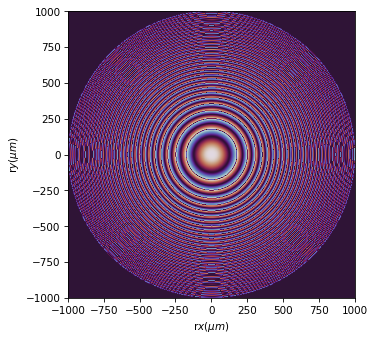

In [17]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter / 2, diameter / 2), focal=(focal, focal))

t0.draw("phase", percentage_intensity=0.01)

u1 = u0 * t0

**RS**

CPU times: user 698 ms, sys: 159 ms, total: 858 ms
Wall time: 741 ms


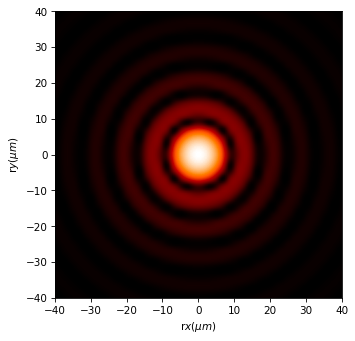

In [18]:
%%time
u2_rs = u1.RS(z=focal)

u2_rs.cut_resample(x_limits=(-40, 40),
                   y_limits=(-40, 40),
                   num_points=(128, 128),
                   new_field=False,
                   interp_kind=(3, 1))

u2_rs.draw(logarithm=1e-2)


**CZT**

CPU times: user 147 ms, sys: 122 ms, total: 270 ms
Wall time: 125 ms


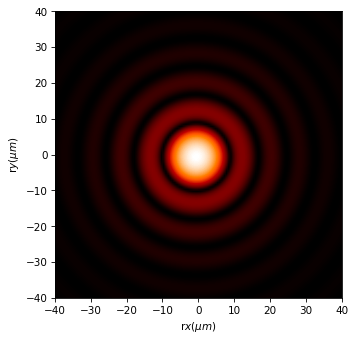

In [19]:
%%time
xout=np.linspace(-40,40,128)
yout=np.linspace(-40,40,128)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout)

u2_czt.draw(logarithm=1e-2)
